In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    data = pd.read_csv("/content/netflix_titles.csv", encoding='latin-1')
    print(data.head())
except FileNotFoundError:
    print("Error: netflix_titles.csv not found. Please upload the file to your Colab environment.")
except Exception as e:
    print(f"An error occurred: {e}")

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Filter comedy shows
comedy_shows = data[data['listed_in'].str.contains('Comedy', na=False)].reset_index(drop=True)
print("Number of Comedy Shows:", len(comedy_shows))


Number of Comedy Shows: 399


Data Preprocessing

In [ ]:
#handle missing values
comedy_shows = comedy_shows.dropna(subset=['description'])

#combine relevant text features for better recommendation
comedy_shows['combined_features'] = (
    comedy_shows['title'] + " " +
    comedy_shows['director'].fillna('') + " " +
    comedy_shows['cast'].fillna('') + " " +
    comedy_shows['description'] + " " +
    comedy_shows['listed_in']
)

EDA

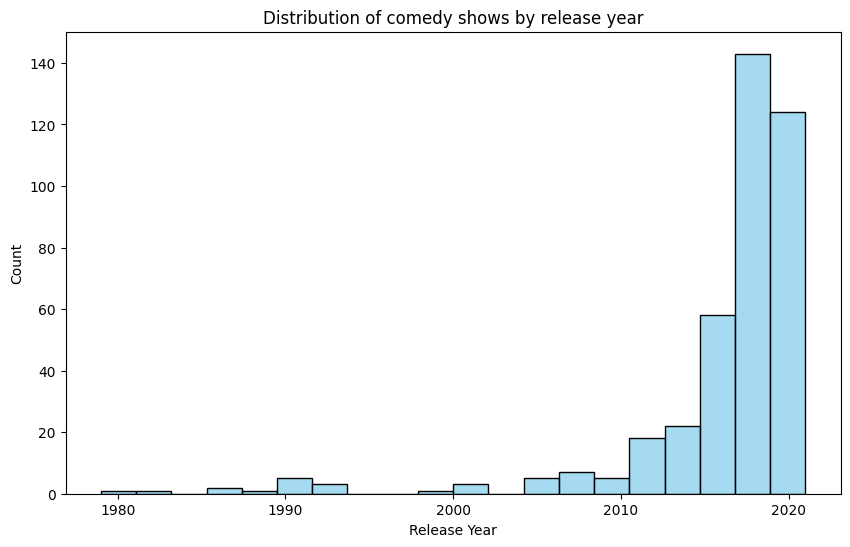

In [ ]:
#plot the distribution of release years
plt.figure(figsize=(10,6))
sns.histplot(comedy_shows['release_year'], kde=False, bins=20, color='skyblue')
plt.title('Distribution of comedy shows by release year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
from collections import Counter
genre_keywords = " ".join(comedy_shows['listed_in']).split(", ")
most_common_genres = Counter(genre_keywords).most_common(10)


<ipython-input-16-0c981e07ac89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in most_common_genres], y=[x[0] for x in most_common_genres], palette="viridis")


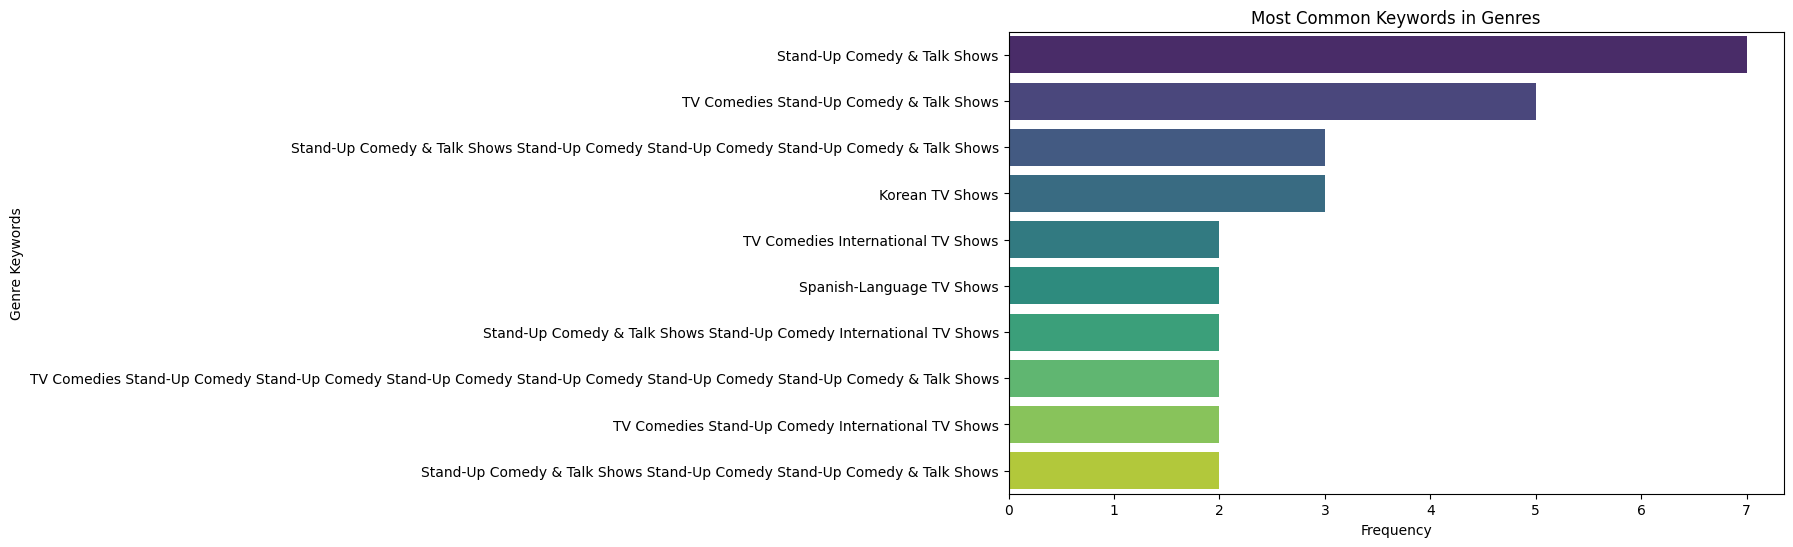

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_genres], y=[x[0] for x in most_common_genres], palette="viridis")
plt.title('Most Common Keywords in Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre Keywords')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(comedy_shows['combined_features'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_shows(type, cosine_sim=cosine_sim):
    try:
        # Get the index of the show
        idx = comedy_shows[comedy_shows['title'].str.contains(type, case=False, na=False)].index[0]

        # Get similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the top 5 similar shows
        sim_scores = sim_scores[1:6]
        show_indices = [i[0] for i in sim_scores]

        return comedy_shows.iloc[show_indices][['type', 'description', 'release_year', 'rating', 'duration']]
    except IndexError:
        return "Title not found in dataset. Please try another title."

# Test recommendation
recommendations = recommend_shows('Movie')
print(recommendations)


      type                                        description  release_year  \
147  Movie  Gabriel "Fluffy" Iglesias discusses his teenag...          2019   
318  Movie  Hawaiian-shirt enthusiast Gabriel "Fluffy" Igl...          2016   
139  Movie  Jeff Dunham returns with a haunted house full ...          2012   
42   Movie  Comedian and "Saturday Night Live" writer Sam ...          2020   
240  Movie  On a mission to defy stereotypes, Malaysian st...          2018   

    rating duration  
147  TV-14   91 min  
318  TV-14   88 min  
139  TV-MA   80 min  
42   TV-MA   64 min  
240  TV-MA   53 min  


In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
